# Lecture 1: Introduction and Data Science Basics


This session will cover how to load data in common formats into python, plot it and calculate basic statistics over it. 

## Dataset

We will use the data/country-stats.tsv file which contains demographic information for 161 countries, collected by The World Bank. Each line contains the following values:

* Country	Name
* GDP per Capita (PPP USD)
* Population Density (persons per sq km)
* Population Growth Rate (%)
* Urban Population (%)
* Life Expectancy at Birth (avg years)
* Fertility Rate (births per woman)
* Infant Mortality (deaths per 1000 births)
* Enrolment Rate, Tertiary (%)
* Unemployment, Total (%)
* Estimated Control of Corruption (scale -2.5 to 2.5)
* Estimated Government Effectiveness (scale -2.5 to 2.5)
* Internet Users (%)

Here is a snippet of this data:

|Country Name|GDP per Capita (PPP USD)|Population Density (persons per sq km)|Population Growth Rate (%)|
| --- | --- | --- | --- |
|Afghanistan|1560.67|44.62|2.44|
|Albania|9403.43|115.11|0.26|
|Algeria|8515.35|15.86|1.89|

In CSV (comma-separated values) format it looks like this:

~~~~
Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%)
Afghanistan,1560.67,44.62,2.44
Albania,9403.43,115.11,0.26
Algeria,8515.35,15.86,1.89
~~~~

## Reading data into Python

To start, we first need to import necessary libraries

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Next, we read in a file in CSV (comma-separated values) format. The first row in the file contains the column names, so we store it separately into a *headers* object. All the other rows get converted to floats and appended to the *data* list. We then print out the first three headers and the first three rows in *data*.

In [2]:
with open('data/country-stats.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    headers = None
    countries = []
    data = []
    for row in csv_reader:
        if headers == None:
            headers = row[1:]
        else:
            countries.append(row[0])
            row = [float(x) for x in row[1:]]
            data.append(row)

print(headers[:3])
print(data[:3])

['GDP per Capita (PPP USD)', 'Population Density (persons per sq km)', 'Population Growth Rate (%)']
[[1560.67, 44.62, 2.44, 23.86, 60.07, 5.39, 71.0, 3.33, 8.5, -1.41, -1.4, 5.45], [9403.43, 115.11, 0.26, 54.45, 77.16, 1.75, 15.0, 54.85, 14.2, -0.72, -0.28, 54.66], [8515.35, 15.86, 1.89, 73.71, 70.75, 2.83, 25.6, 31.46, 10.0, -0.54, -0.55, 15.23]]


Alternatively, we can read a CSV file into a dictionary. This means the values in the header row will act as keys for accessing the values.  
However, we will note be using the dictionary-based structure in these experiments.

In [3]:
with open('data/country-stats.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    data = []
    for row in csv_reader:
        data.append(row)

print(data[4]["Country Name"] + " has population growth rate " + str(data[4]["Population Growth Rate (%)"]) + "%")

Argentina has population growth rate 0.88%


We can also read a file in the TSV (tab-separated values) format using the same method. All we have to do is set the *delimiter='\t'* when creating the *csv.reader*.

In [4]:
with open('data/country-stats.tsv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    headers = None
    countries = []
    data = []
    for row in csv_reader:
        if headers == None:
            headers = row[1:]
        else:
            countries.append(row[0])
            row = [float(x) for x in row[1:]]
            data.append(row)

print(headers[:3])
print(data[:3])

['GDP per Capita (PPP USD)', 'Population Density (persons per sq km)', 'Population Growth Rate (%)']
[[1560.67, 44.62, 2.44, 23.86, 60.07, 5.39, 71.0, 3.33, 8.5, -1.41, -1.4, 5.45], [9403.43, 115.11, 0.26, 54.45, 77.16, 1.75, 15.0, 54.85, 14.2, -0.72, -0.28, 54.66], [8515.35, 15.86, 1.89, 73.71, 70.75, 2.83, 25.6, 31.46, 10.0, -0.54, -0.55, 15.23]]


## Using numpy to operate on numerical data

Our *data* object is currently a list of lists. We convert it into a numpy array object in order to apply numpy operations to to. It is now a matrix with 161 rows and 12 columns, with a total of 1932 elements.

In [5]:
data = np.array(data)
print(data.shape)
print(data.size)

(161, 12)
1932


We can use numpy to access specific elements in this matrix, along with slicing it in different dimensions. `data[1][2]` or `data[1,2]` will access the value at row 1 column 2.

In [6]:
print(data[1][2])
print(data[1,2])

0.26
0.26


The colon ":" means "everything", so `data[1,:]` means row 1 and `data[:,2]` means column 2.

In [7]:
print(data[1,:])
print(data[:,2])

[ 9.40343e+03  1.15110e+02  2.60000e-01  5.44500e+01  7.71600e+01
  1.75000e+00  1.50000e+01  5.48500e+01  1.42000e+01 -7.20000e-01
 -2.80000e-01  5.46600e+01]
[ 2.44  0.26  1.89  1.03  0.88  0.17  1.6   0.46  1.35  1.92  1.19  0.5
  0.85  2.43  2.73  1.68  1.65 -0.14  0.87  1.4  -0.6   2.86  3.19  1.76
  2.54  1.14  0.78  3.    0.9   0.49  1.32  2.44  1.42 -0.32  1.11  0.18
  0.36  1.52  0.4   1.26  1.6   1.66  0.66  2.8   3.28 -0.04  2.58  0.78
  0.48  0.5   2.39  0.63  0.11  2.17 -0.18  0.39  2.53  2.56  0.57  1.39
  2.03 -0.28  0.35  1.26  1.25  1.32  2.54  0.26  1.81  0.32  2.29  0.21
 -0.2   2.19  1.43  2.7   3.95  1.22  1.89 -1.6   0.96  1.08  2.68 -1.48
  2.49  0.08  2.8   2.86  1.66  1.93  2.99  0.4   2.49  0.42  1.24 -0.04
  1.52  0.07  1.43  2.5   0.85  1.87  1.16  0.45  0.63  1.46  3.84  2.79
  1.32  1.69  1.64  2.17  1.72  1.25  1.72  0.02 -0.29  7.05 -0.27  0.4
  2.77  1.15  0.89  0.01  0.78  2.65  1.88  2.92 -0.48  0.39  1.91  0.22
  0.26  1.18  0.45  0.09  1.04  0.9   1

The colon can also be mixed with regular indexes, so `data[3:5,:2]` means values that are in rows between 3 (inclusive) and 5 (not inclusive), and in columns up to 2 (not inclusive). 

In [8]:
print(data[3:5,:2])

[[1.964035e+04 2.003500e+02]
 [1.201620e+04 1.488000e+01]]


## Visualizing data with matplotlib

In order to explore the data, we can plot it. The distribution of values in one dimension can be visualized with a histogram. It divides the value range into equal-sized buckets and counts how many values are in each bucket.

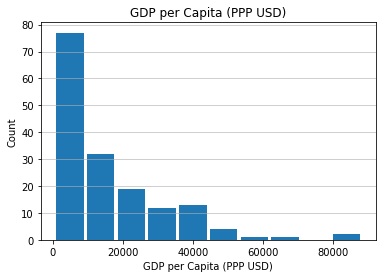

In [9]:
def plot_histogram(data_vector, label):
    n, bins, patches = plt.hist(x=data_vector, bins=10, color='#1f77b4', rwidth=0.9)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_histogram(data[:,0], headers[0])

We can also plot two values in relation to each other. For example, GDP:

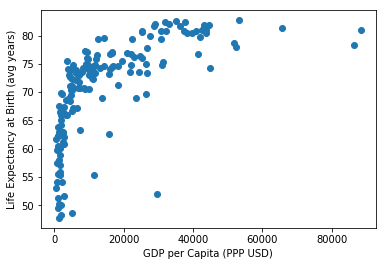

In [10]:
def plot_scatter(data_vector_x, data_vector_y, label_x, label_y):
    plt.scatter(data_vector_x, data_vector_y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

plot_scatter(data[:,0], data[:, 4], headers[0], headers[4])

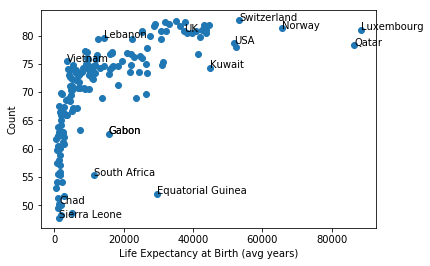

In [11]:
plt.scatter(data[:,0], data[:,4])
plt.xlabel(headers[4])
plt.ylabel('Count')
for i in [43, 27, 130, 117, 84, 152, 155, 50, 108, 80, 133, 50, 140, 158, 76]:
    plt.annotate(countries[i], (data[i][0], data[i][4]))
plt.show()

## Calculating statistics with numpy

Two of the most common statistics to calculate on a numerical dataset are mean and standard deviation.
Mean is the average of all the values in the dataset and gives an indication of the trends in the data.
Standard deviation measures how far the data is spread around the mean -- high deviation indicates that the values are very spread out.  
Let's calculate mean and standard deviation over the population growth rate values.

Growth mean: 1.3394409937888199
Growth std: 1.1492407693330189


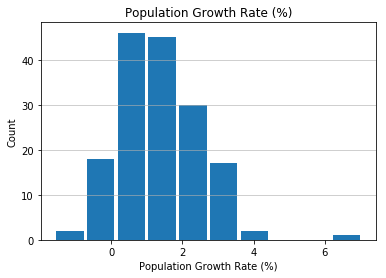

In [12]:
growth_mean = np.mean(data[:,2])
print("Growth mean: " + str(growth_mean))

growth_std = np.std(data[:,2])
print("Growth std: " + str(growth_std))

plot_histogram(data[:,2], headers[2])

Mean and standard deviation are useful, but they can also be misleading.  
When using these measures, we commonly assume that we are dealing with normal (Gaussian) distributions, but they can lead to unexpected results when this is not true.

It worked quite well for population growth rate, because the values indeed have an approximately Gaussian distribution.

<img src="https://notebooks.azure.com/marekrei/libraries/cl-datasci-pnp-marek/raw/lecture1-introduction%2Fimg%2Fpopulation_growth_gaussian.png" align="left">

However, it doesn't work as well for enrolment rate, which has a much more skewed distribution.

<img src="https://notebooks.azure.com/marekrei/libraries/cl-datasci-pnp-marek/raw/lecture1-introduction%2Fimg%2Fenrolment_rate_gaussian.png" align="left">

When dealing with unusual distributions, median can be a more suitable measure.

In [18]:
median_enrolment_rate = np.median(data[:,7])
"Median enrolment rate: " + str(median_enrolment_rate)

'Median enrolment rate: 26.79'

Calculating the minimum and maximum values can help detect outliers in the dataset.

In [23]:
minimum_gdp_per_capita = np.min(data[:,0])
"Minimum GDP per capita: " + str(minimum_gdp_per_capita)

'Minimum GDP per capita: 551.27'

In [21]:
maximum_gdp_per_capita = np.max(data[:,0])
"Maximum GDP per capita: " + str(maximum_gdp_per_capita)

'Maximum GDP per capita: 88286.0'

We might want to sort and list the countries according to a specific value. For this, we can create a dictionary (hashmap) with country names as keys and the data series as values. This dictionary can then be sorted by value.

In [15]:
countries_by_gdp = {}
for i in range(len(countries)):
    countries_by_gdp[countries[i]] = data[i][0]

sorted_countries_by_gdp = sorted(countries_by_gdp.items(), key=lambda kv: kv[1], reverse=True)
print("Countries with largest GDP per capita")
for country, gdp in sorted_countries_by_gdp[:5]:
    print(country + ": " + str(gdp))

Countries with largest GDP per capita
Luxembourg: 88286.0
Qatar: 86506.64
Norway: 65639.83
Switzerland: 53366.72
Brunei: 52482.33


In [16]:
print("Correlations with GDP per capita")
for i in range(1, len(data[0,:])):
    corr, p = scipy.stats.pearsonr(data[:,0], data[:,i])
    print(str(round(corr, 3)) + "\t" + headers[i])

Correlations with GDP per capita
0.072	Population Density (persons per sq km)
-0.153	Population Growth Rate (%)
0.639	Urban Population (%)
0.644	Life Expectancy at Birth (avg years)
-0.526	Fertility Rate (births per woman)
-0.586	Infant Mortality (deaths per 1000 births)
0.537	Enrolment Rate, Tertiary (%)
-0.107	Unemployment, Total (%)
0.76	Estimated Control of Corruption (scale -2.5 to 2.5)
0.786	Estimated Government Effectiveness (scale -2.5 to 2.5)
0.821	Internet Users (%)
